In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
file = open('Dry_Bean_Dataset.csv')
x = list()
y = list()
first = file.readline()
while True:
  data = file.readline()
  if data == '' :
    break
  data_split = data.split(',')
  y.append(data_split[-1][1:-2])
  data_split.pop()
  temp = list()
  for i in data_split:
    temp.append(i[1:-1])
  x.append(temp)

In [4]:
x_train,x_test, y_train,y_test = train_test_split(x,y,stratify=y, random_state = 1016)

In [5]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train_sc = scaler.transform(x_train)
x_test_sc = scaler.transform(x_test)

In [6]:
pca = PCA(n_components=2)
pca.fit(x_train_sc)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [7]:
x_train_pca = pca.transform(x_train_sc)
x_test_pca = pca.transform(x_test_sc)

print("Original : {}".format(str(x_train_sc.shape)))
print("Reduced : {}".format(str(x_train_pca.shape)))

Original : (10208, 16)
Reduced : (10208, 2)


In [8]:
color_label = y_train[:]
for i in range(len(color_label)):
  if color_label[i] == 'DERMASON':
    color_label[i] = 'red'
  elif color_label[i] == 'HOROZ':
    color_label[i] = 'orange'
  elif color_label[i] == 'CALI':
    color_label[i] = 'yellow'
  elif color_label[i] == 'SEKER':
    color_label[i] = 'green'
  elif color_label[i] == 'BARBUNYA':
    color_label[i] = 'blue'
  elif color_label[i] == 'SIRA':
    color_label[i] = 'black'
  elif color_label[i] == 'BOMBAY':
    color_label[i] = 'purple'

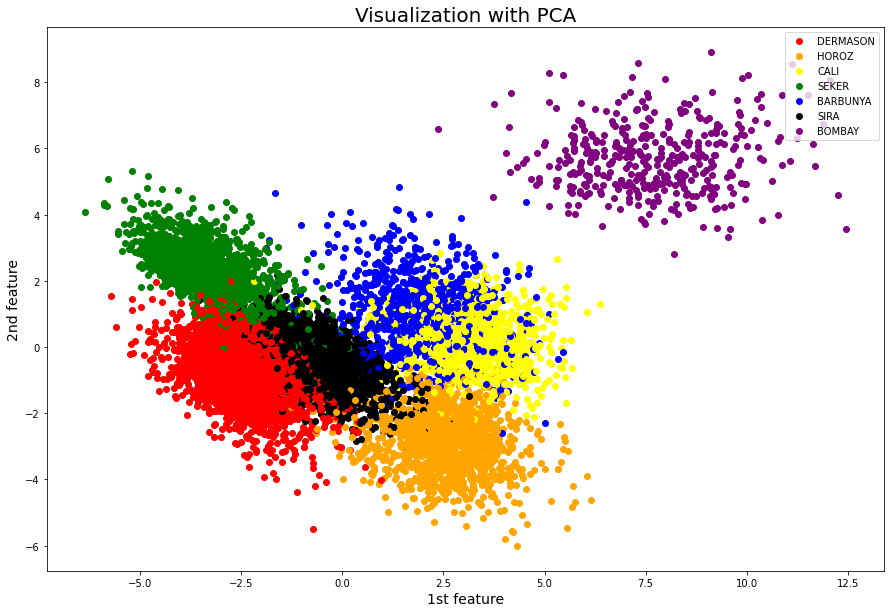

In [18]:
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15, 10))
for i in range(len(x_train_pca)):
  plt.scatter(x_train_pca[i][0], 
            x_train_pca[i][1], 
            c = color_label[i])
  
legend_elements = [Line2D([0], [0], marker='o', color = 'w', label = 'DERMASON', markerfacecolor='red', markersize=8),
                   Line2D([0], [0], marker='o', color= 'w', label = 'HOROZ', markerfacecolor = 'orange', markersize=8),
                   Line2D([0], [0], marker='o', color= 'w', label = 'CALI', markerfacecolor = 'yellow', markersize=8),
                   Line2D([0], [0], marker='o', color= 'w', label = 'SEKER', markerfacecolor = 'green', markersize=8),
                   Line2D([0], [0], marker='o', color= 'w', label = 'BARBUNYA', markerfacecolor = 'blue', markersize=8),
                   Line2D([0], [0], marker='o', color= 'w', label = 'SIRA', markerfacecolor = 'black', markersize=8),
                   Line2D([0], [0], marker='o', color= 'w', label = 'BOMBAY', markerfacecolor = 'purple', markersize=8),]
plt.legend(handles = legend_elements, loc='upper right')
plt.title('Visualization with PCA', fontsize=20)
plt.xlabel('1st feature', fontsize=14)
plt.ylabel('2nd feature', fontsize=14)
plt.show()

In [19]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state = 1016)
x_train_tsne = tsne.fit_transform(x_train_sc)

In [20]:
print("Original : {}".format(str(x_train_sc.shape)))
print("Reduced : {}".format(str(x_train_tsne.shape)))

Original : (10208, 16)
Reduced : (10208, 2)


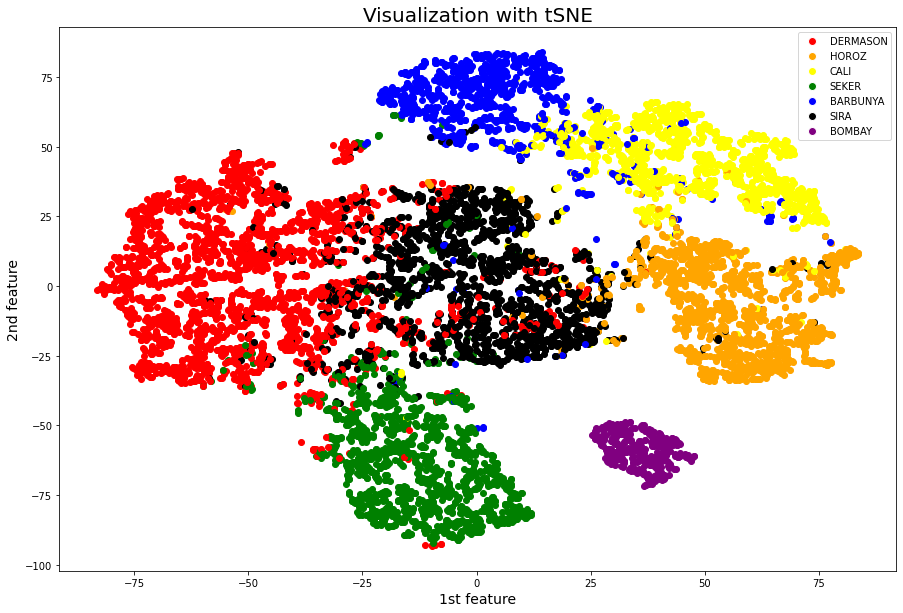

In [21]:
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15, 10))
for i in range(len(x_train_tsne)):
  plt.scatter(x_train_tsne[i][0], 
            x_train_tsne[i][1], 
            c = color_label[i])
  
legend_elements = [Line2D([0], [0], marker='o', color = 'w', label = 'DERMASON', markerfacecolor='red', markersize=8),
                   Line2D([0], [0], marker='o', color= 'w', label = 'HOROZ', markerfacecolor = 'orange', markersize=8),
                   Line2D([0], [0], marker='o', color= 'w', label = 'CALI', markerfacecolor = 'yellow', markersize=8),
                   Line2D([0], [0], marker='o', color= 'w', label = 'SEKER', markerfacecolor = 'green', markersize=8),
                   Line2D([0], [0], marker='o', color= 'w', label = 'BARBUNYA', markerfacecolor = 'blue', markersize=8),
                   Line2D([0], [0], marker='o', color= 'w', label = 'SIRA', markerfacecolor = 'black', markersize=8),
                   Line2D([0], [0], marker='o', color= 'w', label = 'BOMBAY', markerfacecolor = 'purple', markersize=8),]
plt.legend(handles = legend_elements, loc='upper right')
plt.title('Visualization with tSNE', fontsize=20)
plt.xlabel('1st feature', fontsize=14)
plt.ylabel('2nd feature', fontsize=14)
plt.show()